In [5]:
# data cleaning code
import pandas as pd

# Load the current dataset
df = pd.read_csv('data1.csv')  # replace with your actual file

# Normalize column names
df.columns = df.columns.str.lower()

# Remove any leading 'P' or 'p' and strip whitespace
df['patient_id'] = df['patient_id'].astype(str).str.strip().str.lstrip('Pp')


# ----- Map categorical columns -----

# HBB mutation type (already numeric in some rows)
if 'hbb_mutation_type' in df.columns:
    hbb_map = {'β⁰': 0.0, 'β⁺': 0.5, 'βˢ': 1.0}
    df['hbb_mutation_type'] = df['hbb_mutation_type'].apply(lambda x: hbb_map.get(x, x))

# KLF1 variant
if 'klf1_variant' in df.columns:
    klf1_map = {'Normal': 0, 'E325K': 1}
    df['klf1_variant'] = df['klf1_variant'].apply(lambda x: klf1_map.get(x, x))

# HBG1 promoter mutation
if 'hbg1_promoter_mut' in df.columns:
    hbg1_map = {'Yes': 1, 'No': 0}
    df['hbg1_promoter_mut'] = df['hbg1_promoter_mut'].apply(lambda x: hbg1_map.get(x, x))

# DNA methylation HBG
if 'dna_methylation_hbg' in df.columns:
    dna_map = {'Moderate': 0.5, 'High': 1, 'Low': 0}
    df['dna_methylation_hbg'] = df['dna_methylation_hbg'].apply(lambda x: dna_map.get(x, x))

# Histone acetylation
if 'histone_acetylation' in df.columns:
    histone_map = {'Moderate': 0.5, 'High': 1, 'Low': 0}
    df['histone_acetylation'] = df['histone_acetylation'].apply(lambda x: histone_map.get(x, x))

# miR 486/386 3p level
if 'mir_486_3p_level' in df.columns:
    mir_map = {'Low': 1.0, 'Normal': 0.5, 'High': 0.0}
    df['mir_486_3p_level'] = df['mir_486_3p_level'].apply(lambda x: mir_map.get(x, x))

# Drug treatment
if 'drug_treatment' in df.columns:
    drug_map = {'Decitabine': 1.0, 'Hydroxyurea': 0.8, 'Butyrate': 0.6, 'None': 0}
    df['drug_treatment'] = df['drug_treatment'].apply(lambda x: drug_map.get(x, x))

# Splenectomy
if 'splenectomy' in df.columns:
    splen_map = {'Yes': 1, 'No': 0}
    df['splenectomy'] = df['splenectomy'].apply(lambda x: splen_map.get(x, x))

# Sex
if 'sex' in df.columns:
    sex_map = {'M': 0, 'F': 1}
    df['sex'] = df['sex'].apply(lambda x: sex_map.get(x, x))

# Severity label
if 'severity_label' in df.columns:
    severity_map = {'Severe': 2, 'Moderate': 1, 'Mild': 0, 'Normal': 0}
    df['severity_label'] = df['severity_label'].apply(lambda x: severity_map.get(x, x))

# ----- Optional: Check for remaining non-numeric values -----
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns remaining:", non_numeric_cols)
else:
    print("All columns are numeric!")

# Save cleaned dataset
df.to_csv('data2.csv', index=False)
print("Cleaned dataset saved as data2.csv")


Non-numeric columns remaining: Index(['patient_id'], dtype='object')
Cleaned dataset saved as data2.csv


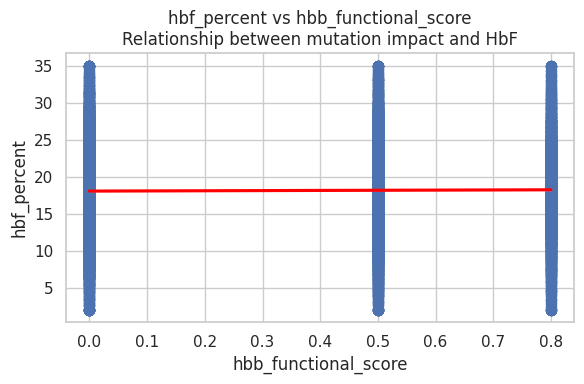

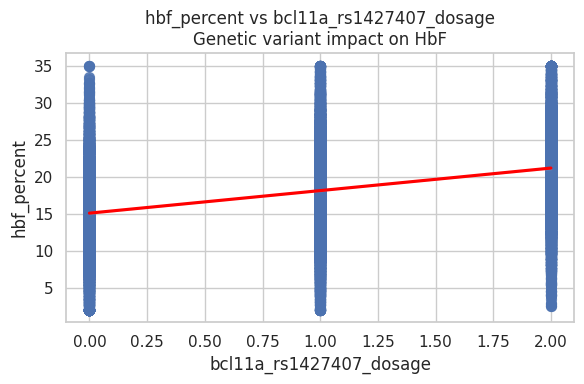

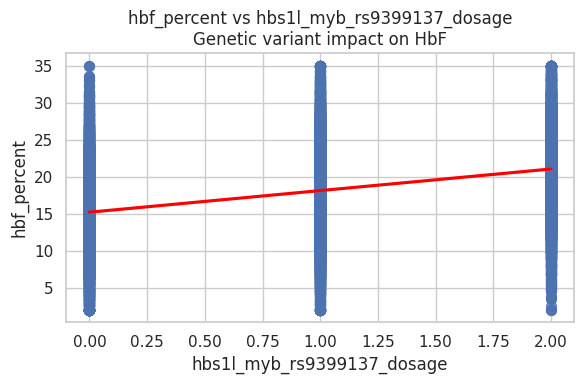

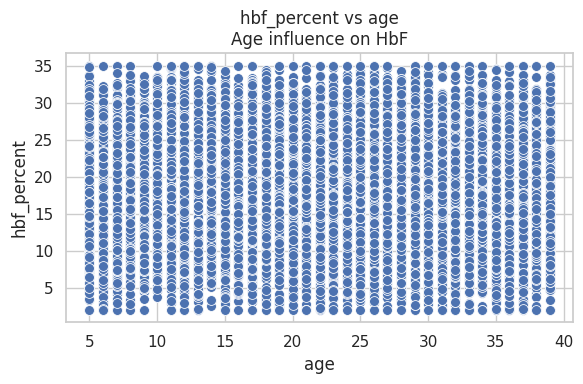

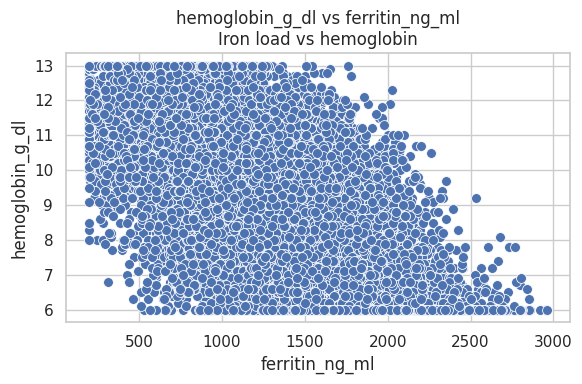

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv('data2.csv')

# Normalize column names
df.columns = df.columns.str.lower()

# Define the X and Y columns and their plot types
scatter_plots = [
    ('hbb_functional_score', 'hbf_percent', True, 'Relationship between mutation impact and HbF'),
    ('bcl11a_rs1427407_dosage', 'hbf_percent', True, 'Genetic variant impact on HbF'),
    ('hbs1l_myb_rs9399137_dosage', 'hbf_percent', True, 'Genetic variant impact on HbF'),
    ('age', 'hbf_percent', False, 'Age influence on HbF'),
    ('ferritin_ng_ml', 'hemoglobin_g_dl', False, 'Iron load vs hemoglobin')
]

# Generate scatterplots
for x_col, y_col, regression, note in scatter_plots:
    plt.figure(figsize=(6,4))
    if regression:
        sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'s':50}, line_kws={'color':'red'})
    else:
        sns.scatterplot(data=df, x=x_col, y=y_col, s=50)
    plt.title(f'{y_col} vs {x_col}\n{note}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()


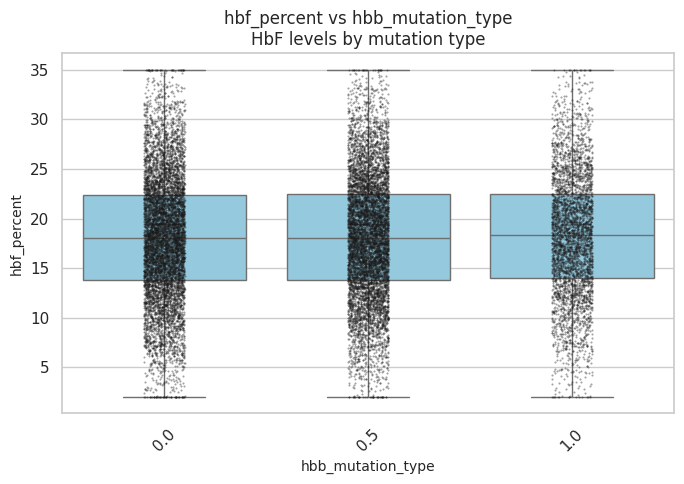

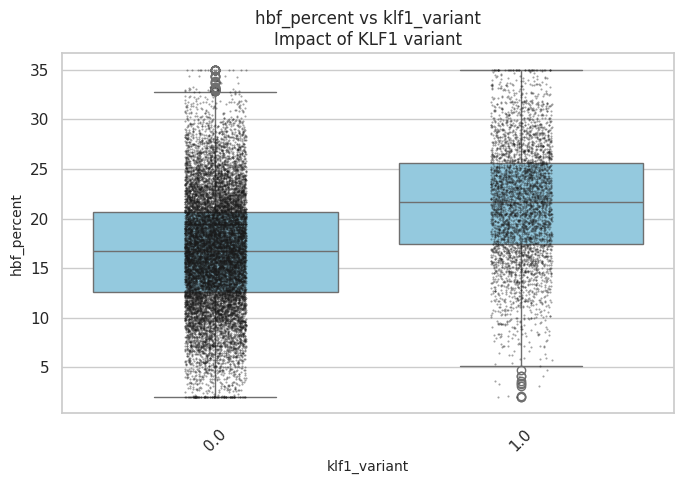

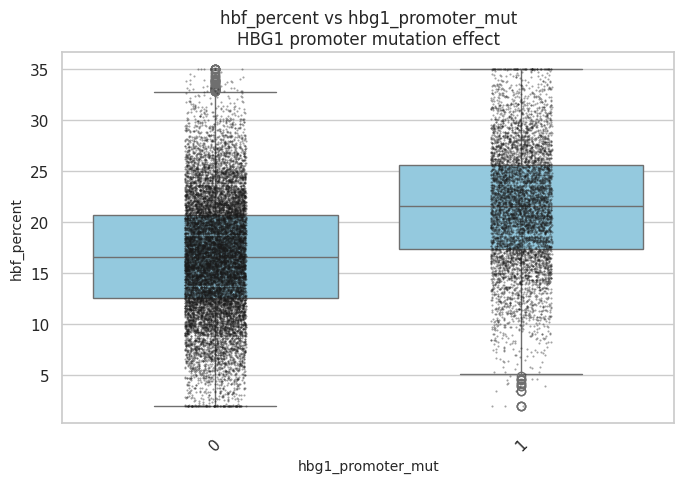

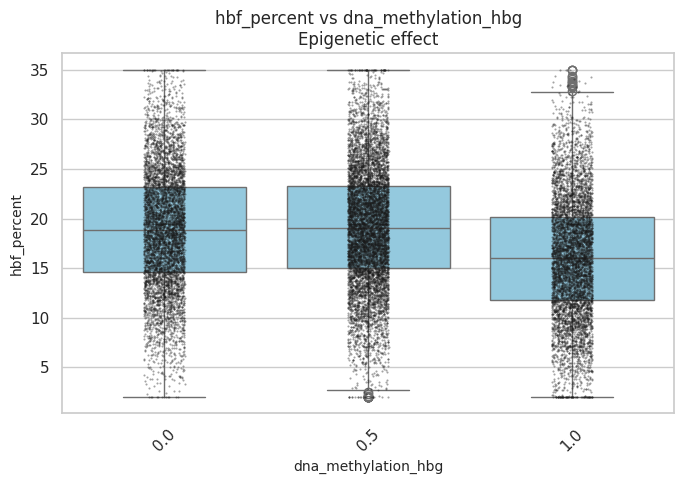

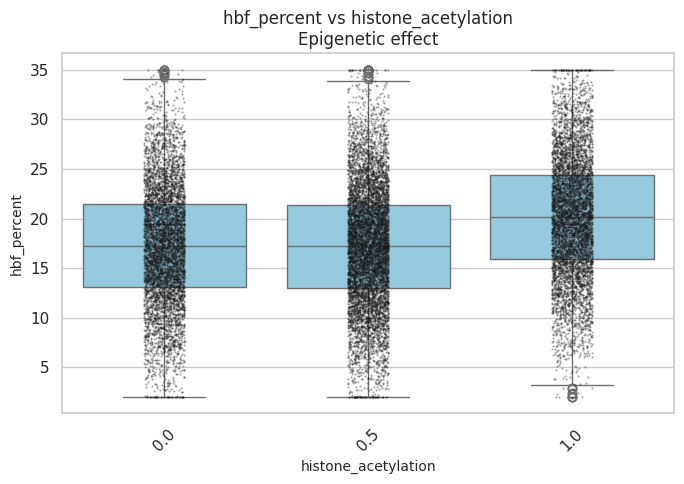

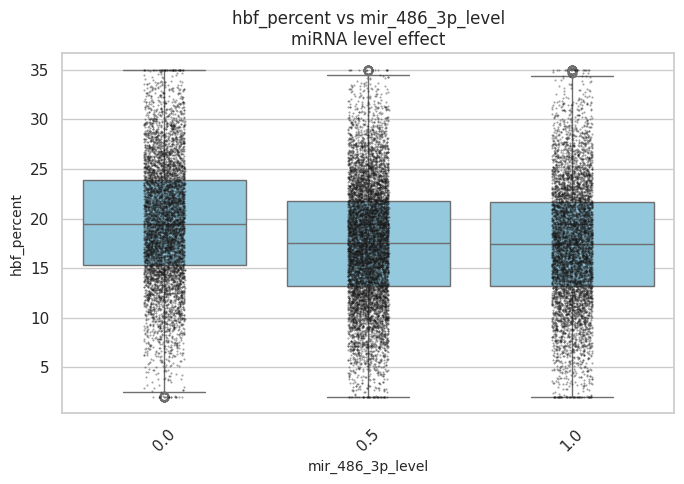

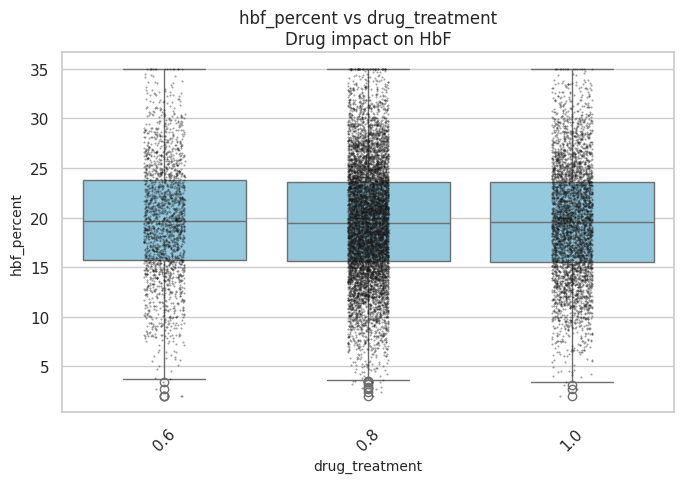

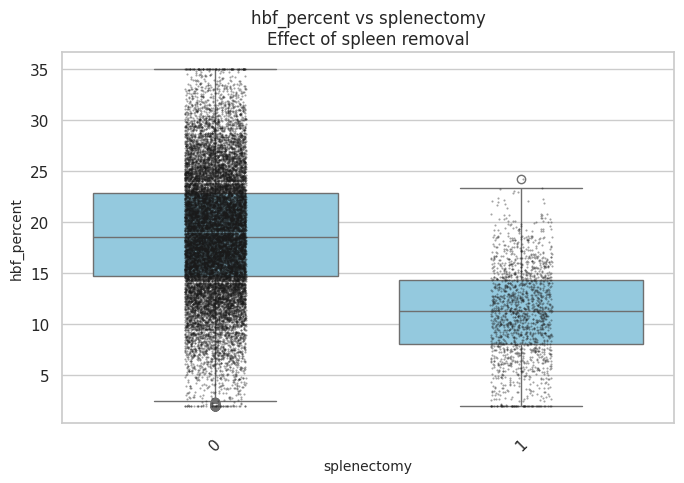

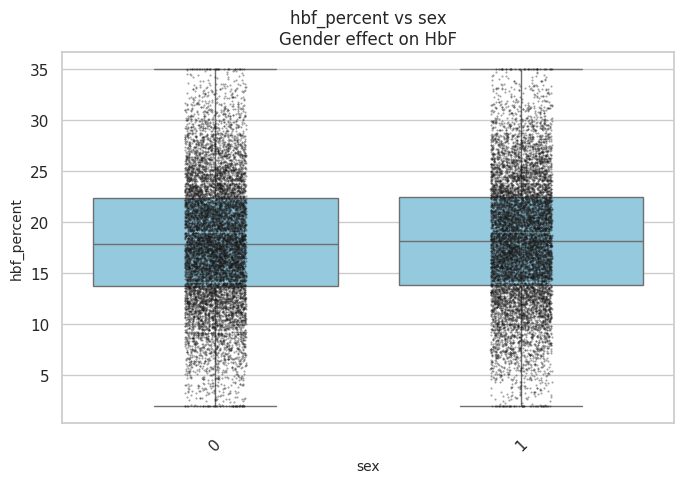

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv('data2.csv')

# Normalize column names
df.columns = df.columns.str.lower()

# List of categorical vs numeric plots
cat_numeric_plots = [
    ('hbb_mutation_type', 'hbf_percent', 'HbF levels by mutation type'),
    ('klf1_variant', 'hbf_percent', 'Impact of KLF1 variant'),
    ('hbg1_promoter_mut', 'hbf_percent', 'HBG1 promoter mutation effect'),
    ('dna_methylation_hbg', 'hbf_percent', 'Epigenetic effect'),
    ('histone_acetylation', 'hbf_percent', 'Epigenetic effect'),
    ('mir_486_3p_level', 'hbf_percent', 'miRNA level effect'),
    ('drug_treatment', 'hbf_percent', 'Drug impact on HbF'),
    ('splenectomy', 'hbf_percent', 'Effect of spleen removal'),
    ('sex', 'hbf_percent', 'Gender effect on HbF')
]

# Set seaborn style
sns.set(style="whitegrid")

# Generate the plots
for cat_col, num_col, note in cat_numeric_plots:
    plt.figure(figsize=(7,5))
    
    # Boxplot
    sns.boxplot(data=df, x=cat_col, y=num_col, color='skyblue')
    
    # Overlay stripplot for individual points
    sns.stripplot(data=df, x=cat_col, y=num_col, color='k', alpha=0.4, jitter=True, size=1.5)
    
    plt.title(f'{num_col} vs {cat_col}\n{note}', fontsize=12)
    plt.xlabel(cat_col, fontsize=10)
    plt.ylabel(num_col, fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



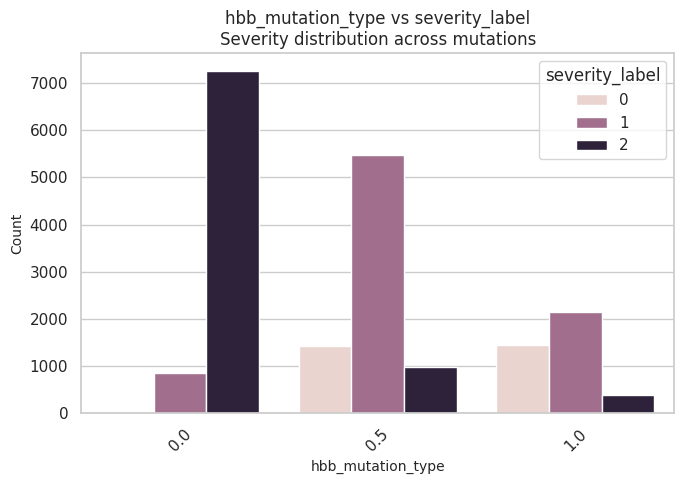

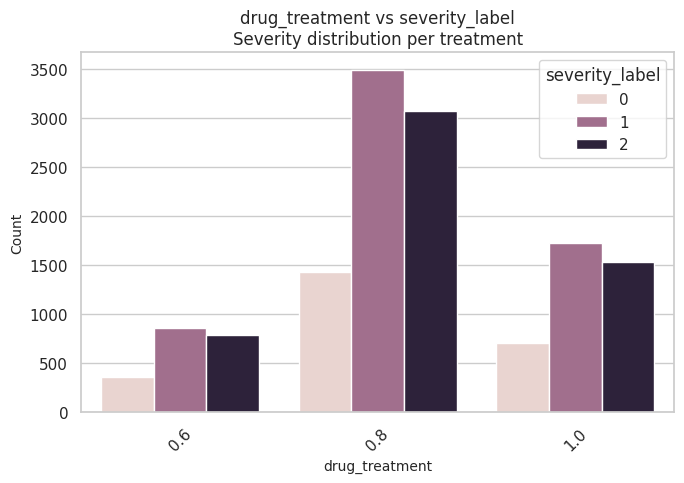

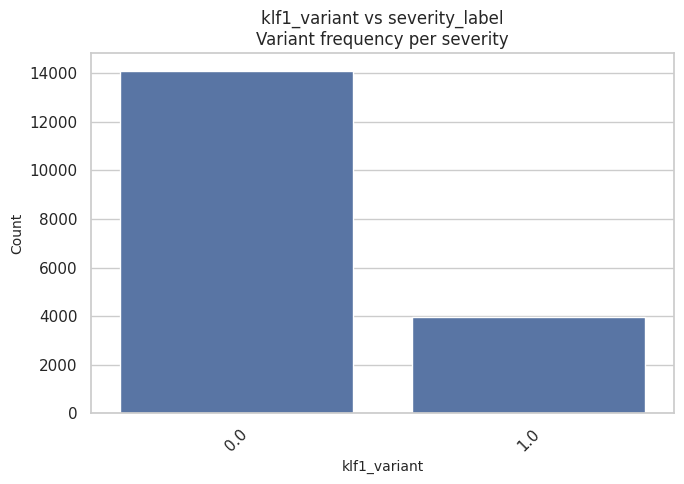

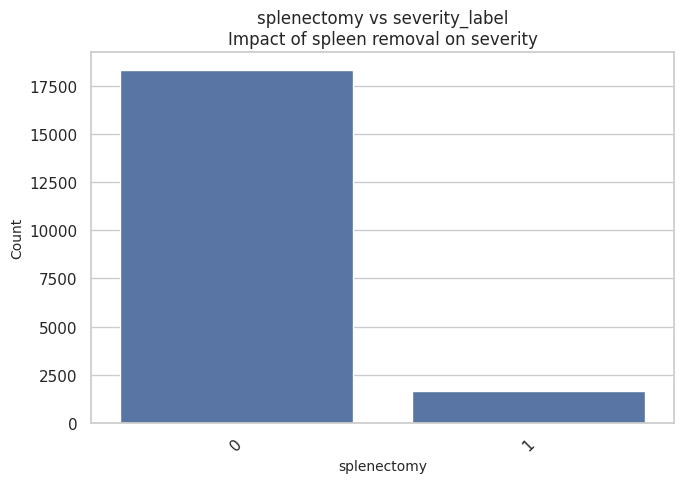

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv('data2.csv')

# Normalize column names
df.columns = df.columns.str.lower()

# Set seaborn style
sns.set(style="whitegrid")

# List of categorical vs categorical plots
cat_cat_plots = [
    ('hbb_mutation_type', 'severity_label', 'Severity distribution across mutations', True),  # stacked bar
    ('drug_treatment', 'severity_label', 'Severity distribution per treatment', True),         # stacked bar
    ('klf1_variant', 'severity_label', 'Variant frequency per severity', False),               # simple count
    ('splenectomy', 'severity_label', 'Impact of spleen removal on severity', False)           # simple count
]

# Generate plots
for x_col, hue_col, note, stacked in cat_cat_plots:
    plt.figure(figsize=(7,5))
    
    if stacked:  # use hue for stacked/colored bars
        sns.countplot(data=df, x=x_col, hue=hue_col)
        plt.legend(title=hue_col)
    else:  # simple countplot
        sns.countplot(data=df, x=x_col)
    
    plt.title(f'{x_col} vs {hue_col}\n{note}', fontsize=12)
    plt.xlabel(x_col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
